# Linear Regression at Codecademy Project
For this project, you’ll get to work as a data analyst alongside the curriculum team at Codecademy to help us improve the learner experience. While this data is simulated, it is similar to real data that we might want to investigate as Codecademy team members!

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Inspect the data
Load dataset and save as a dataframe named `codecademy`. We’re imagining that this data was collected as part of an experiment to understand factors that contribute to learner performance on a quiz. The data contains three columns:
- **score:** student score on a quiz
- **completed:** the number of other content items on Codecademy that the learner has completed prior to this quiz
- **lesson:** indicates which lesson the learner took directly before the quiz ('`Lesson A`' or '`Lesson B`')

Take a look at this dataset by printing the first five rows.

In [2]:
codecademy = pd.read_csv("codecademy.csv")
codecademy.head()

,score,completed,lesson
0,82.7,35.0,Lesson A
1,65.2,31.0,Lesson A
2,55.3,33.0,Lesson A
3,28.8,25.0,Lesson B
4,31.2,18.0,Lesson B


## Model the relationship between quiz score and number of completed content items
### Task 1
Plot a scatter plot of `score` (y-axis) against `completed` (x-axis) to see the relationship between quiz score and number of completed content items.

Is there a relationship between these two variables, and does it appear to be linear?

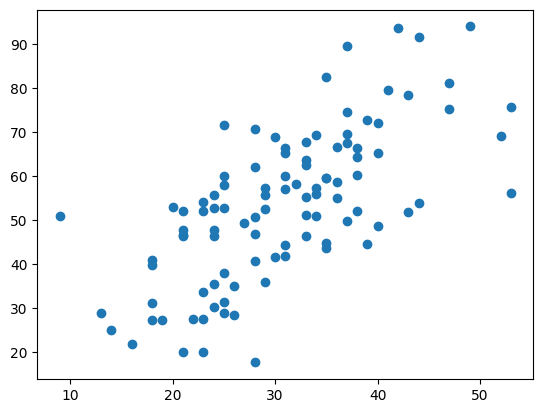

In [7]:
plt.scatter(data = codecademy, x = "completed", y = "score");
# Yes there is a linear relationship between completed and score variables.

### Task 2
Create and fit a linear regression model that predicts `score` using `completed` as the predictor. Print out the regression coefficients.

In [9]:
model = sm.OLS.from_formula("score ~ completed", data = codecademy)
model = model.fit()

In [10]:
model.params

Intercept    13.214113
completed     1.306826
dtype: float64

### Task 3
Write a one-sentence (each) interpretation of the slope and intercept that you printed out in the previous step. Make sure to comment out the interpretation so your code still runs.

### Task 4
Plot the same scatter plot that you made earlier (with `score` on the y-axis and `completed` on the x-axis), but this time add the regression line on top of the plot. Make sure to show, then clear the plot.

Do you think this line fits the data well?

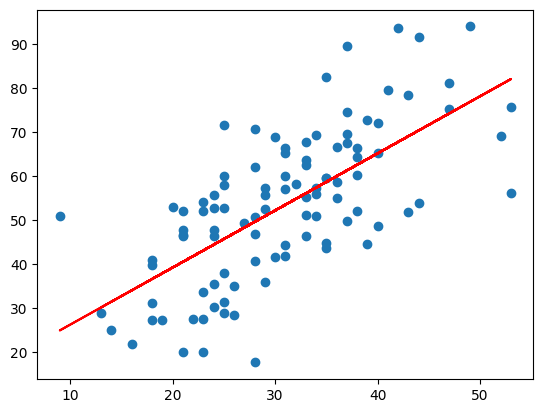

In [34]:
predicted_score = 1.30 * codecademy["completed"] + 13.21
plt.scatter(data = codecademy, x = "completed", y = "score")
plt.plot(codecademy["completed"], predicted_score, c = "r");

# Yes, I think this line fits data well.

### Task 5
Use your model to calculate the predicted quiz score for a learner who has previously completed 20 other content items.

In [16]:
newdata = {"completed" : 20}
model.predict(newdata)[0]

39.35062487732294

### Task 6
Calculate the fitted values for your model and save them as `fitted_values`.

In [17]:
fitted_values = model.predict(codecademy["completed"])

### Task 7
Calculate the residuals for the model and save the result as `residuals`.

In [18]:
residuals = codecademy["score"] - fitted_values

### Task 8
Check the normality assumption for linear regression by plotting a histogram of the residuals.

Do the residuals appear to be approximately normally distributed?

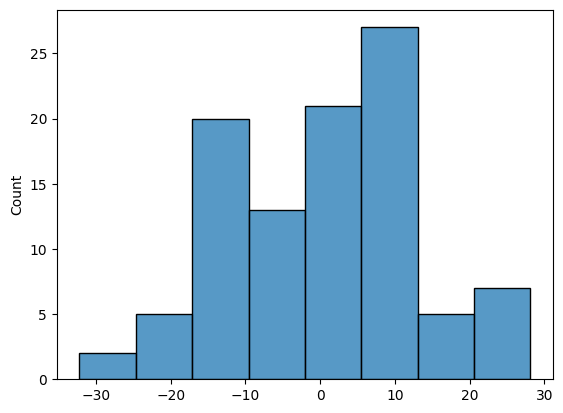

In [23]:
sns.histplot(residuals);
# Yes, the residuals appear to be approximately normally distributed.

### Task 9
Check the homoscedasticity assumption for linear regression by plotting the residuals (y-axis) against the fitted values (x-axis).

Do you see any patterns or is the homoscedasticity assumption met?

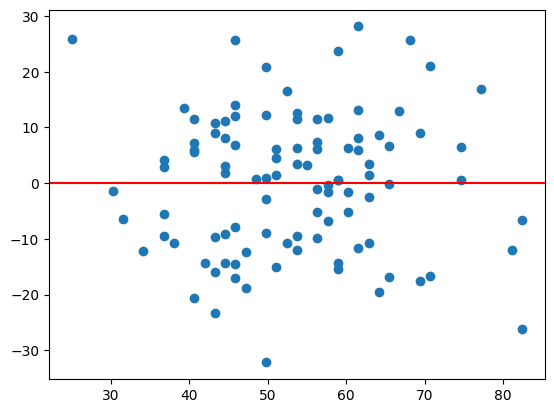

In [26]:
plt.scatter(fitted_values, residuals)
plt.axhline(0, c="r");
# There is no pattern. The homoscedasticity assumption is met.

## Do learners who take lesson A or B perform better on the quiz?
### Task 10
Let’s now turn our attention to the `lessons` column to see if learners who took different lessons scored differently on the quiz.

Use `sns.boxplot` to create a boxplot of `score` (y-variable) for each `lesson` (x-variable) to see the relationship between quiz score and which lesson the learner completed immediately before taking the quiz. Make sure to show, then clear the plot.

Does one lesson appear to do a better job than the other of preparing students for this quiz? If so, which one?

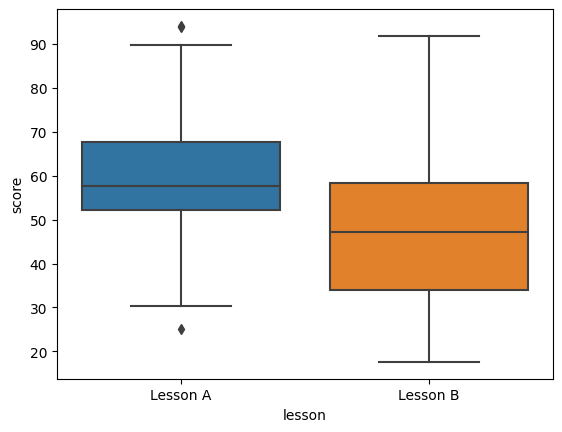

In [38]:
sns.boxplot(data = codecademy, x = "lesson", y = "score");
# Lesson A appear to do a better job than the other of preparing students for this quiz.

### Task 11
Create and fit a linear regression model that predicts `score` using `lesson` as the predictor. Print out the regression coefficients.


In [40]:
model2 = sm.OLS.from_formula("score ~ lesson", data = codecademy)
model2 = model2.fit()

In [41]:
model2.params

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64

### Task 12
- Calculate and print out the mean quiz scores for learners who took lesson A and lesson B.
- Calculate and print out the mean difference.

Can you see how these numbers relate to the intercept and slope that you printed out in the linear regression output?

In [43]:
codecademy.groupby("lesson")["score"].mean()

lesson
Lesson A    59.220
Lesson B    47.578
Name: score, dtype: float64

In [47]:
lesson_a_mean = codecademy[codecademy["lesson"] == "Lesson A"]["score"].mean()
lesson_a_mean

59.22

In [48]:
lesson_b_mean = codecademy[codecademy["lesson"] == "Lesson B"]["score"].mean()
lesson_b_mean

47.57800000000001

In [49]:
lesson_a_mean - lesson_b_mean

11.641999999999989

## Next Steps
The next step in linear regression is to model quiz scores as a function of multiple other variables at once! To get a preview of what this might look like visually, let’s try using `seaborn`‘s `lmplot()` function to plot a scatter plot of `score` vs. `completed`, colored by lesson.

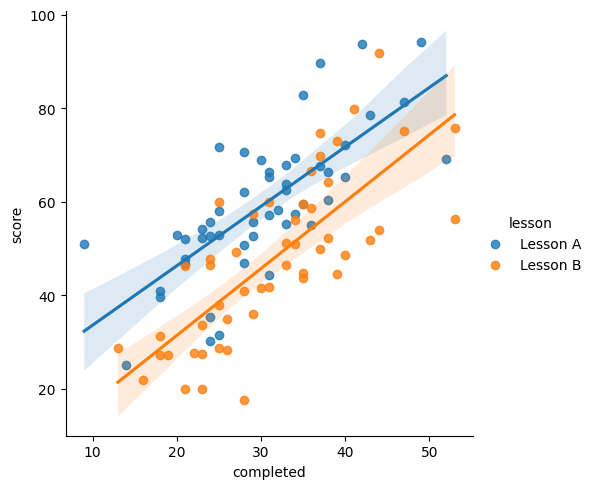

In [52]:
sns.lmplot(data = codecademy, x = "completed", y = "score", hue = "lesson");